# Plane Crash data cleaning

__Goal__: Your colleague, a senior data scientist, is interested in working with the plane crashes dataset provided as an attachment to this assignment. They are interested in exploring the data to try to find any interesting patterns, trends, and relationships, but do not have a specific purpose or analytic goal in mind at this time. You have been asked to prepare this data for use and provide an analysis of the underlying data.

![planecrash](https://cdn.dribbble.com/users/1459485/screenshots/9400160/plane-illustration-dribble_4x.png)

## Reading the raw data

In [1]:
import pandas as pd
import numpy as np

In [2]:
original = pd.read_csv("./plane_crashes_data_format.csv") #saved and read as utf-8 format
df = original.copy()
df.head()

,date,time,location,operator,flight_no,route,ac_type,registration,cn_ln,aboard,fatalities,ground,summary
0,17-Sep-08,17:18,"Fort Myer, Virginia",Military - U.S. Army,?,Demonstration,Wright Flyer III,?,1,2 (passengers:1 crew:1),1 (passengers:1 crew:0),0,"During a demonstration flight, a U.S. Army fly..."
1,07-Sep-09,?,"Juvisy-sur-Orge, France",?,?,Air show,Wright Byplane,SC1,?,1 (passengers:0 crew:1),1 (passengers:0 crew:0),0,Eugene Lefebvre was the first pilot to ever be...
2,12-Jul-12,6:30,"Atlantic City, New Jersey",Military - U.S. Navy,?,Test flight,Dirigible,?,?,5 (passengers:0 crew:5),5 (passengers:0 crew:5),0,First U.S. dirigible Akron exploded just offsh...
3,06-Aug-13,?,"Victoria, British Columbia, Canada",Private,?,?,Curtiss seaplane,?,?,1 (passengers:0 crew:1),1 (passengers:0 crew:1),0,The first fatal airplane accident in Canada oc...
4,09-Sep-13,c 18:30,Over the North Sea,Military - German Navy,?,?,Zeppelin L-1 (airship),?,?,20 (passengers:? crew:?),14 (passengers:? crew:?),0,The airship flew into a thunderstorm and encou...


In [3]:
df.shape

(5783, 13)

In [4]:
#The data is a mess!
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5783 entries, 0 to 5782
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          5783 non-null   object
 1   time          5783 non-null   object
 2   location      5783 non-null   object
 3   operator      5783 non-null   object
 4   flight_no     5783 non-null   object
 5   route         5783 non-null   object
 6   ac_type       5783 non-null   object
 7   registration  5783 non-null   object
 8   cn_ln         5783 non-null   object
 9   aboard        5783 non-null   object
 10  fatalities    5783 non-null   object
 11  ground        5783 non-null   object
 12  summary       5783 non-null   object
dtypes: object(13)
memory usage: 587.5+ KB


In [5]:
#change  '?' to NA in all columns
df = df.replace({"?": np.nan})

## 1. Date

In [6]:
df.date.value_counts

<bound method IndexOpsMixin.value_counts of 0       17-Sep-08
1       07-Sep-09
2       12-Jul-12
3       06-Aug-13
4       09-Sep-13
          ...    
5778    10-Jul-18
5779    04-Aug-18
5780    28-Sep-18
5781    29-Oct-18
5782    06-Nov-18
Name: date, Length: 5783, dtype: object>

In [7]:
look_up = {'Jan':'01',
           'Feb':'02',
           'Mar':'03',
           'Apr':'04',
           'May':'05',
           'Jun':'06',
           'Jul':'07',
           'Aug':'08',
           'Sep':'09',
           'Oct':'10',
           'Nov':'11',
           'Dec':'12'}

df["date_parsed"] = df.date.replace(to_replace = look_up, regex=True)
df["date_parsed"] = pd.to_datetime(df['date_parsed'], format = "%d-%m-%y") #two-digit year is %y not %Y
df[["date","date_parsed"]]

,date,date_parsed
0,17-Sep-08,2008-09-17
1,07-Sep-09,2009-09-07
2,12-Jul-12,2012-07-12
3,06-Aug-13,2013-08-06
4,09-Sep-13,2013-09-09
...,...,...
5778,10-Jul-18,2018-07-10
5779,04-Aug-18,2018-08-04
5780,28-Sep-18,2018-09-28
5781,29-Oct-18,2018-10-29


In [8]:
# More Quality Check on date_parsed

df.date_parsed.dt.year.describe()

count    5783.000000
mean     2015.211655
std        32.372612
min      1969.000000
25%      1987.000000
50%      2006.000000
75%      2048.000000
max      2068.000000
Name: date_parsed, dtype: float64

In [9]:
# There are some values from the future which could not be right!
df.loc[df.date_parsed.dt.year > 2020,["date", "date_parsed", ]]

,date,date_parsed
50,03-Feb-21,2021-02-03
51,09-Feb-21,2021-02-09
52,15-Feb-21,2021-02-15
53,22-Feb-21,2021-02-22
54,06-Apr-21,2021-04-06
...,...,...
2446,26-Dec-68,2068-12-26
2447,26-Dec-68,2068-12-26
2448,27-Dec-68,2068-12-27
2449,31-Dec-68,2068-12-31


In [10]:
# As shown above, the error comes from wrong assignment to years. '68' is actually 1968 instead of 2068
# It seems the most latest year amount in the raw data is '18' (2018) and it starts from early 1908!!!
# It is best to find the index of the year 2000 as the data is ordered originally chronologically
# and append the 19-- or 20-- manually
# the challange is that year comes at the end of the string

In [11]:
df["date_parsed"] = df.date.replace(to_replace = look_up, regex=True)

df.date_parsed.str.lstrip().str.rstrip()
df.date_parsed

# As shown below initial year is 1908 (08) going to 2018 (18)


0       17-09-08
1       07-09-09
2       12-07-12
3       06-08-13
4       09-09-13
          ...   
5778    10-07-18
5779    04-08-18
5780    28-09-18
5781    29-10-18
5782    06-11-18
Name: date_parsed, Length: 5783, dtype: object

In [12]:
idx = df.date_parsed[df.date_parsed.str.split("-").str[-1] == "00"].index.min() #index that shows the beginning of 2000s
idx

4898

In [13]:
y19 = df.iloc[:idx, :].date_parsed
y19

0       17-09-08
1       07-09-09
2       12-07-12
3       06-08-13
4       09-09-13
          ...   
4893    22-12-99
4894    24-12-99
4895    25-12-99
4896    25-12-99
4897    29-12-99
Name: date_parsed, Length: 4898, dtype: object

In [14]:
y19 = y19.str.split("-").str[0] + "-" + y19.str.split("-").str[1] + "-" + "19" + y19.str.split("-").str[-1]
y19

0       17-09-1908
1       07-09-1909
2       12-07-1912
3       06-08-1913
4       09-09-1913
           ...    
4893    22-12-1999
4894    24-12-1999
4895    25-12-1999
4896    25-12-1999
4897    29-12-1999
Name: date_parsed, Length: 4898, dtype: object

In [15]:
#finding the index for first occurance of 00 as year
y20 = df.iloc[idx:, :].date_parsed
y20 = y20.str.split("-").str[0] + "-" + y20.str.split("-").str[1] + "-" + "20" + y20.str.split("-").str[-1]
y20

4898    05-01-2000
4899    10-01-2000
4900    13-01-2000
4901    15-01-2000
4902    25-01-2000
           ...    
5778    10-07-2018
5779    04-08-2018
5780    28-09-2018
5781    29-10-2018
5782    06-11-2018
Name: date_parsed, Length: 885, dtype: object

In [16]:
#appending and applying the changes back to actual dataframe
df.date_parsed = y19.append(y20)
df["date_parsed"] = pd.to_datetime(df['date_parsed'], format = "%d-%m-%Y") #two-digit year is %y not %Y
df["date_parsed"]

0      1908-09-17
1      1909-09-07
2      1912-07-12
3      1913-08-06
4      1913-09-09
          ...    
5778   2018-07-10
5779   2018-08-04
5780   2018-09-28
5781   2018-10-29
5782   2018-11-06
Name: date_parsed, Length: 5783, dtype: datetime64[ns]

## 2. Time 

Some inputs are starting with random characters like 'c' or ":". First step is to remove all non-numerical chars.

In [17]:
df.time

0         17:18
1           NaN
2          6:30
3           NaN
4       c 18:30
         ...   
5778        744
5779       1655
5780       1010
5781        631
5782        253
Name: time, Length: 5783, dtype: object

In [18]:
from string import ascii_letters

df["time_parsed"] = df["time"].map(lambda x: x.lstrip(ascii_letters + "c :").rstrip(ascii_letters), na_action='ignore') #modified after ":17:00" was found
df["time_parsed"] = df["time_parsed"].map(lambda x: x.replace(";", ":"), na_action='ignore') #modified after "10;00" was found
df["time_parsed"] = df["time_parsed"].map(lambda x: x.replace('"', ":"), na_action='ignore') #modified after "22"08" was found


In [19]:
df.loc[~df.time.str.contains(":", na = True), "time_parsed"] = df.time[~df.time.str.contains(":", na = True)].map(
    lambda s: s[0:-2] + ":" + s[-2:] )

In [20]:
#replace with nan
display(df.time_parsed[df.time_parsed.map(lambda x: len(x), na_action='ignore') < 4])
df.loc[df.time_parsed.map(lambda x: len(x), na_action='ignore') < 4, "time_parsed"] = np.nan

708      :2
1462     :5
5686    :50
5718    :19
5727    :20
Name: time_parsed, dtype: object

In [21]:
#applying zero-padding otherwise pd.to_date will not work
df[['hour', 'min']] = df['time_parsed'].str.split(':', 1, expand=True)
df["hour"]= df["hour"].str.pad(2,fillchar='0')
df["min"]= df["min"].str.pad(2,fillchar='0')

In [22]:
df["time_parsed"] = df["hour"] + ":" + df["min"]
df.drop(["hour", "min"], axis = 1, inplace = True)

In [23]:
df[["time", "time_parsed"]]

,time,time_parsed
0,17:18,17:18
1,NaN,NaN
2,6:30,06:30
3,NaN,NaN
4,c 18:30,18:30
...,...,...
5778,744,07:44
5779,1655,16:55
5780,1010,10:10
5781,631,06:31


In [24]:
###################################################

In [25]:
# I will not parse them to a single date-time as the time column contains NA values
df[["date_parsed", "time_parsed"]]

,date_parsed,time_parsed
0,1908-09-17,17:18
1,1909-09-07,NaN
2,1912-07-12,06:30
3,1913-08-06,NaN
4,1913-09-09,18:30
...,...,...
5778,2018-07-10,07:44
5779,2018-08-04,16:55
5780,2018-09-28,10:10
5781,2018-10-29,06:31


In [26]:
#now the time variable is ready to be changed to time-type
df.time_parsed.value_counts()
df["time_parsed"] = pd.to_datetime(df['time_parsed'], errors = "coerce", format = "%H:%M") #for NAs


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5783 entries, 0 to 5782
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          5783 non-null   object        
 1   time          3675 non-null   object        
 2   location      5777 non-null   object        
 3   operator      5762 non-null   object        
 4   flight_no     1347 non-null   object        
 5   route         4289 non-null   object        
 6   ac_type       5759 non-null   object        
 7   registration  5431 non-null   object        
 8   cn_ln         4576 non-null   object        
 9   aboard        5783 non-null   object        
 10  fatalities    5783 non-null   object        
 11  ground        5731 non-null   object        
 12  summary       5552 non-null   object        
 13  date_parsed   5783 non-null   datetime64[ns]
 14  time_parsed   3656 non-null   datetime64[ns]
dtypes: datetime64[ns](2), object(13)
memor

## Missing value analysis

> time, route, cn_ln contain the most missing valus

In [28]:
round(df.isna().sum() / df.shape[0] * 100, 2)

date             0.00
time            36.45
location         0.10
operator         0.36
flight_no       76.71
route           25.83
ac_type          0.42
registration     6.09
cn_ln           20.87
aboard           0.00
fatalities       0.00
ground           0.90
summary          3.99
date_parsed      0.00
time_parsed     36.78
dtype: float64

## 3. Location

In [29]:
df.location

0                      Fort Myer, Virginia
1                  Juvisy-sur-Orge, France
2                Atlantic City, New Jersey
3       Victoria, British Columbia, Canada
4                       Over the North Sea
                       ...                
5778                Pretoria, South Africa
5779                    Flims, Switzerland
5780                     Chuuk, Micronesia
5781                Off Jakarta, Indonesia
5782                    Georgetown, Guyana
Name: location, Length: 5783, dtype: object

In [30]:
df.location.str.split(", ").str[-1]

0                 Virginia
1                   France
2               New Jersey
3                   Canada
4       Over the North Sea
               ...        
5778          South Africa
5779           Switzerland
5780            Micronesia
5781             Indonesia
5782                Guyana
Name: location, Length: 5783, dtype: object

In [31]:
# It seems it shows country name for the majority of observations
# however US flights contain state name
# therefore I import a package that lists all the states
import us
state_names = [state.name for state in us.states.STATES_AND_TERRITORIES]
len(state_names) # apparently there is 55 US states now!

55

In [32]:
df["loc_cln"] = df.location.str.split(", ").str[-1].str.rstrip().str.lstrip()
df.loc_cln = df.loc_cln.replace(to_replace = state_names, value = "USA")
df.loc_cln

0                      USA
1                   France
2                      USA
3                   Canada
4       Over the North Sea
               ...        
5778          South Africa
5779           Switzerland
5780            Micronesia
5781             Indonesia
5782                Guyana
Name: loc_cln, Length: 5783, dtype: object

In [33]:
df.loc_cln = df.loc_cln.astype('category')
df.loc_cln.value_counts()
#There is still many work here, but we will keep it at that

USA                                    1478
Russia                                  261
Brazil                                  202
Colombia                                163
Canada                                  159
                                       ... 
Louisana                                  1
London                                    1
Lesotho                                   1
Leeward Islands                           1
off the Philippine island of Elalat       1
Name: loc_cln, Length: 500, dtype: int64

## 4. Operator

Airline or operator of the aircraft

In [34]:
df["operator"]

0         Military - U.S. Army
1                          NaN
2         Military - U.S. Navy
3                      Private
4       Military - German Navy
                 ...          
5778                 Rovos Air
5779                    Ju Air
5780               Air Niugini
5781                  Lion Air
5782       Fly Jamaica Airways
Name: operator, Length: 5783, dtype: object

In [35]:
df.operator.isna().sum()

21

In [36]:
df["military_flag"] = df.operator.str.contains("Military", case = False)

In [37]:
df.military_flag.sum()

832

In [38]:
pd.set_option('display.max_rows', 500)
df[["operator", "military_flag"]].loc[df["military_flag"] == False,:].operator.value_counts()

Aeroflot                               260
Air France                              72
Deutsche Lufthansa                      64
United Air Lines                        44
China National Aviation Corporation     43
                                      ... 
Kodiak Western Alaska Airlines           1
Mercer Airlines                          1
Falcon Airways - Air Taxi                1
Frigorifico Maniqui                      1
Fly Jamaica Airways                      1
Name: operator, Length: 2587, dtype: int64

In [39]:
df.drop("flight_no", axis = 1, inplace=True) #contains no usable info, lots of missing too

## Route

In [40]:
pd.set_option('display.max_rows', 100)
df.route.value_counts()

Training                               95
Sightseeing                            42
Test flight                            20
Test                                    7
Sao Paulo - Rio de Janeiro              7
                                       ..
Mount Isa - Longreach                   1
Eugene - Portland                       1
Osaka - Matsuyama                       1
Mukalla to\nMayfa'ah - Arden, Yemen     1
Georgetown - Toronto                    1
Name: route, Length: 3874, dtype: int64

## Aircraft Type

In [41]:
pd.set_option("display.max_rows", 100)
df.ac_type.value_counts()

Douglas DC-3                                341
de Havilland Canada DHC-6 Twin Otter 300     86
Douglas C-47A                                74
Douglas C-47                                 67
Douglas DC-4                                 41
                                           ... 
Tupolev TU-114B                               1
PBY-5A Catalina                               1
Consolidated  PBY-5A Catalina                 1
Boeing 727-21                                 1
Boeing 757-N23                                1
Name: ac_type, Length: 2741, dtype: int64

In [42]:
### Lot's of Douglas
df.ac_type.str.contains("douglas", case=False).sum() / df.shape[0]


0.1988587238457548

That is around 20 percent of accidents, The majority being a __Douglas DC-3__ plane.

In [43]:
for ac_type in ["douglas", "boeing", "tupolev"]:
    x = df.ac_type.str.contains(ac_type, case = False).sum()
    print(ac_type + ": " + str(x) + " and total percentage " + str(round(x / df.shape[0] * 100, 2)))
##not much information here

douglas: 1150 and total percentage 19.89
boeing: 410 and total percentage 7.09
tupolev: 110 and total percentage 1.9


## Registration: ICAO registration of the aircraft

Not much information here

In [44]:
pd.set_option("display.max_rows", 50)
df.registration.value_counts()

49            3
CCCP-11180    2
CCCP-87458    2
PT-EPH        2
N303GA        2
             ..
TF-ISU        1
CCCP-75866    1
I-TAVI        1
SA-R-7        1
N524AT        1
Name: registration, Length: 5391, dtype: int64

## Construction or serial number / Line or fuselage number

No info here as well.

In [45]:
df.cn_ln.value_counts()

1            10
6             8
3             7
4             7
229           7
             ..
30            1
6341801       1
45409/19      1
3065          1
30233/895     1
Name: cn_ln, Length: 4069, dtype: int64

## Passengers and Crew numbers

In [46]:
df.aboard

0           2   (passengers:1  crew:1)
1           1   (passengers:0  crew:1)
2           5   (passengers:0  crew:5)
3           1   (passengers:0  crew:1)
4          20   (passengers:?  crew:?)
                     ...              
5778      19   (passengers:16  crew:3)
5779      20   (passengers:17  crew:3)
5780     47   (passengers:35  crew:12)
5781    189   (passengers:181  crew:8)
5782    128   (passengers:120  crew:8)
Name: aboard, Length: 5783, dtype: object

In [47]:
tot = df.aboard.str.split("(",1).str[0].str.rstrip().str.lstrip() #also removing any spaces

In [48]:
#checking if all values are numeric
pd.to_numeric(tot, errors = "coerce").isna().sum()

#some are non numerical, let's take a closer look in the next cell

40

In [49]:
df["tot_aboard"] = df.aboard.str.split("(",1).str[0].str.rstrip().str.lstrip()

df.loc[pd.to_numeric(df.tot_aboard, errors = "coerce").isna(), ["aboard", "tot_aboard"]].head()

,aboard,tot_aboard
101,? (passengers:? crew:?),?
345,? (passengers:? crew:?),?
361,? (passengers:? crew:?),?
377,? (passengers:? crew:?),?
440,? (passengers:? crew:?),?


In [50]:
#now that we know where the problem is, we'll replace those rows with NaN.
df.loc[pd.to_numeric(df.tot_aboard, errors = "coerce").isna(), ["aboard", "tot_aboard"]] = np.nan #this is an example of __

In [51]:
#display(df.loc[pd.to_numeric(df.tot_aboard, errors = "coerce").isna(), ["aboard", "tot_aboard"]])
df.tot_aboard = pd.to_numeric(df.tot_aboard, errors = "coerce")

In [52]:
#Now let's create two more columns for passengers and crew count

df["tot_crew"] = df.aboard.str.split(":").str[-1].str.replace(")", "", regex = False).str.lstrip().str.rstrip()
df["tot_crew"] = pd.to_numeric(df.tot_crew, errors = "coerce") #

In [53]:
df["tot_pass"] = pd.to_numeric(
    df.aboard.str.split("\(passengers:").str[1].str.split("crew").str[0].str.lstrip().str.rstrip(),
    errors = "coerce")

#### Checking the dervied totals

In [54]:
display(df.loc[:, ["aboard", "tot_aboard", "tot_pass", "tot_crew"]])
display(df.loc[:, ["aboard", "tot_aboard", "tot_pass", "tot_crew"]].isnull().sum()) #missing values does make sense

,aboard,tot_aboard,tot_pass,tot_crew
0,2 (passengers:1 crew:1),2.0,1.0,1.0
1,1 (passengers:0 crew:1),1.0,0.0,1.0
2,5 (passengers:0 crew:5),5.0,0.0,5.0
3,1 (passengers:0 crew:1),1.0,0.0,1.0
4,20 (passengers:? crew:?),20.0,NaN,NaN
...,...,...,...,...
5778,19 (passengers:16 crew:3),19.0,16.0,3.0
5779,20 (passengers:17 crew:3),20.0,17.0,3.0
5780,47 (passengers:35 crew:12),47.0,35.0,12.0
5781,189 (passengers:181 crew:8),189.0,181.0,8.0


aboard         40
tot_aboard     40
tot_pass      543
tot_crew      539
dtype: int64

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5783 entries, 0 to 5782
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           5783 non-null   object        
 1   time           3675 non-null   object        
 2   location       5777 non-null   object        
 3   operator       5762 non-null   object        
 4   route          4289 non-null   object        
 5   ac_type        5759 non-null   object        
 6   registration   5431 non-null   object        
 7   cn_ln          4576 non-null   object        
 8   aboard         5743 non-null   object        
 9   fatalities     5783 non-null   object        
 10  ground         5731 non-null   object        
 11  summary        5552 non-null   object        
 12  date_parsed    5783 non-null   datetime64[ns]
 13  time_parsed    3656 non-null   datetime64[ns]
 14  loc_cln        5777 non-null   category      
 15  military_flag  5762 n

## Fatalities number
Has to be parsed 

In [56]:
df.fatalities

0           1   (passengers:1  crew:0)
1           1   (passengers:0  crew:0)
2           5   (passengers:0  crew:5)
3           1   (passengers:0  crew:1)
4          14   (passengers:?  crew:?)
                     ...              
5778        1   (passengers:0  crew:1)
5779      20   (passengers:17  crew:3)
5780        1   (passengers:1  crew:0)
5781    189   (passengers:181  crew:8)
5782        1   (passengers:1  crew:0)
Name: fatalities, Length: 5783, dtype: object

In [57]:
df["tot_fatal"] = df.fatalities.str.split("(",1).str[0].str.rstrip().str.lstrip()
df["tot_fatal"] = pd.to_numeric(df.tot_fatal, errors = "coerce")

In [58]:
df["fatal_crew"] = df.fatalities.str.split(":").str[-1].str.replace(")", "", regex = False).str.lstrip().str.rstrip()
df["fatal_crew"] = pd.to_numeric(df.fatal_crew, errors = "coerce") 

df["fatal_pass"] = pd.to_numeric(
    df.fatalities.str.split("\(passengers:").str[1].str.split("crew").str[0].str.lstrip().str.rstrip(),
    errors = "coerce")

In [59]:
display(df.loc[:, df.columns.str.contains("fatal")])
display(df.loc[:, df.columns.str.contains("fatal")].isnull().sum()) #missing values does make sense

,fatalities,tot_fatal,fatal_crew,fatal_pass
0,1 (passengers:1 crew:0),1.0,0.0,1.0
1,1 (passengers:0 crew:0),1.0,0.0,0.0
2,5 (passengers:0 crew:5),5.0,5.0,0.0
3,1 (passengers:0 crew:1),1.0,1.0,0.0
4,14 (passengers:? crew:?),14.0,NaN,NaN
...,...,...,...,...
5778,1 (passengers:0 crew:1),1.0,1.0,0.0
5779,20 (passengers:17 crew:3),20.0,3.0,17.0
5780,1 (passengers:1 crew:0),1.0,0.0,1.0
5781,189 (passengers:181 crew:8),189.0,8.0,181.0


fatalities      0
tot_fatal      11
fatal_crew    556
fatal_pass    558
dtype: int64

In [60]:
df.loc[:, df.columns.str.contains("fatal")].describe()

,tot_fatal,fatal_crew,fatal_pass
count,5772.000000,5227.000000,5225.000000
mean,41.081428,3.352018,16.943158
std,1607.501441,3.131580,32.622593
min,0.000000,0.000000,0.000000
25%,3.000000,1.000000,1.000000
50%,9.000000,3.000000,5.000000
75%,22.000000,4.000000,18.000000
max,122122.000000,46.000000,560.000000


In [61]:
df.tot_fatal.max() #this number does not make sense

122122.0

In [62]:
df.loc[df.tot_fatal == df.tot_fatal.max(), ["fatalities", "tot_fatal"]]

,fatalities,tot_fatal
2736,122122 (passengers:115 crew:7),122122.0


In [63]:
df.loc[df.tot_fatal == df.tot_fatal.max(), "tot_fatal"] = 112

## Total killed on the ground

In [64]:
df.ground = pd.to_numeric(df.ground, errors = "coerce")

In [65]:
df.ground.describe() #Mostly zeros

count    5731.000000
mean        1.526610
std        51.666765
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      2750.000000
Name: ground, dtype: float64

In [66]:
#needs words processing, kept as-is
df.summary

0       During a demonstration flight, a U.S. Army fly...
1       Eugene Lefebvre was the first pilot to ever be...
2       First U.S. dirigible Akron exploded just offsh...
3       The first fatal airplane accident in Canada oc...
4       The airship flew into a thunderstorm and encou...
                              ...                        
5778    Shortly after takeoff from runway 29, the left...
5779    The vintage aircraft crashed onto Piz Segnas m...
5780    The aircraft was approaching for a landing at ...
5781    The airliner crashed into the Jakarta Sea, 13 ...
5782    After taking off and reaching FL200, the crew ...
Name: summary, Length: 5783, dtype: object

# Insights

In [67]:
df.date = df.date_parsed
df.time = df.time_parsed
df.location = df.loc_cln
columns_to_drop = ["date_parsed", "time_parsed", "loc_cln", "cn_ln", "registration", "aboard", "fatalities"]
df = df.drop(columns_to_drop, axis = 1)

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5783 entries, 0 to 5782
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           5783 non-null   datetime64[ns]
 1   time           3656 non-null   datetime64[ns]
 2   location       5777 non-null   category      
 3   operator       5762 non-null   object        
 4   route          4289 non-null   object        
 5   ac_type        5759 non-null   object        
 6   ground         5731 non-null   float64       
 7   summary        5552 non-null   object        
 8   military_flag  5762 non-null   object        
 9   tot_aboard     5743 non-null   float64       
 10  tot_crew       5244 non-null   float64       
 11  tot_pass       5240 non-null   float64       
 12  tot_fatal      5772 non-null   float64       
 13  fatal_crew     5227 non-null   float64       
 14  fatal_pass     5225 non-null   float64       
dtypes: category(1), datet

In [69]:
df.describe()

,ground,tot_aboard,tot_crew,tot_pass,tot_fatal,fatal_crew,fatal_pass
count,5731.000000,5743.000000,5244.000000,5240.000000,5772.000000,5227.000000,5225.000000
mean,1.526610,27.548320,4.141304,23.968893,19.943174,3.352018,16.943158
std,51.666765,42.954194,3.466476,42.257719,33.015760,3.131580,32.622593
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,5.000000,2.000000,2.000000,3.000000,1.000000,1.000000
50%,0.000000,13.000000,3.000000,9.000000,9.000000,3.000000,5.000000
75%,0.000000,30.000000,5.000000,26.000000,22.000000,4.000000,18.000000
max,2750.000000,644.000000,61.000000,614.000000,583.000000,46.000000,560.000000


In [70]:
df.military_flag.value_counts()

False    4930
True      832
Name: military_flag, dtype: int64

In [71]:
df
df.loc[:,["tot_aboard", "tot_fatal", "military_flag"]].groupby("military_flag").agg(['mean', 'count'])

tot_aboard        tot_fatal      
                    mean count       mean count
military_flag                                  
False          27.682319  4898  19.154034  4921
True           27.139928   829  24.932530   830

In [72]:
#total number of accidents in top years
df.date.dt.year.value_counts().sort_values(ascending=False).nlargest(20)

1972    105
1968     97
1967     96
1989     95
1969     91
1970     91
1979     91
1973     91
1976     88
1991     88
1946     88
1994     87
1974     86
1992     86
1977     83
1988     83
1947     82
1996     81
1995     79
1999     79
Name: date, dtype: int64

### Derived Variable: how fatal the accident was?

It is based on total number of fatalities over total number of passenger and crew aboard

In [73]:
df["fatality_rate"] = round((df.tot_fatal / df.tot_aboard) * 100, 2)
df.fatality_rate.describe()

count    5738.000000
mean       83.283804
std        29.985402
min         0.000000
25%        80.000000
50%       100.000000
75%       100.000000
max       100.000000
Name: fatality_rate, dtype: float64

* Average of 41 fatalities per flight
* Maximum fatalities were in commercial airplanes as they had the most passengers
* Majority ( of accidents had a %100 fatality rate.
* Military flights have the same average number of passangers with non-military flights
* Maximum number of accidents happened in 1972

# Visualizations

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

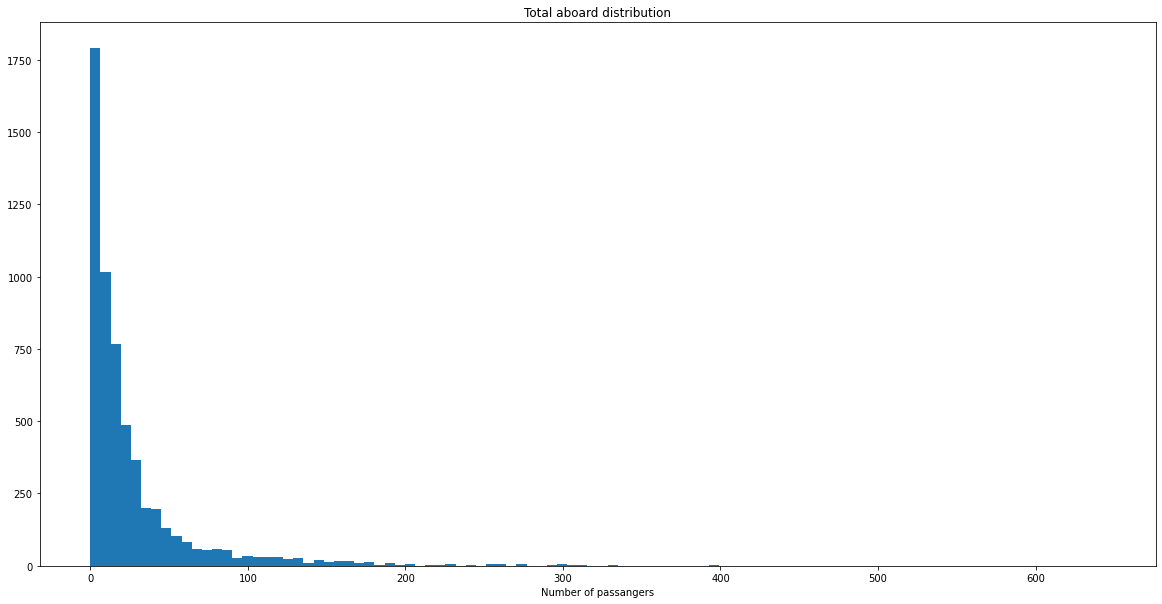

In [75]:
plt.figure(figsize=(20,10))
plt.hist(df.tot_aboard, bins= 100)
plt.title("Total aboard distribution")
plt.xlabel("Number of passangers")
plt.show()

In [76]:
loc_count = df.location.value_counts().nlargest(15)
loc_count

USA          1478
Russia        261
Brazil        202
Colombia      163
Canada        159
France        132
England       107
Indonesia     106
India         105
China          95
Mexico         95
Italy          85
Germany        81
Australia      81
USSR           72
Name: location, dtype: int64

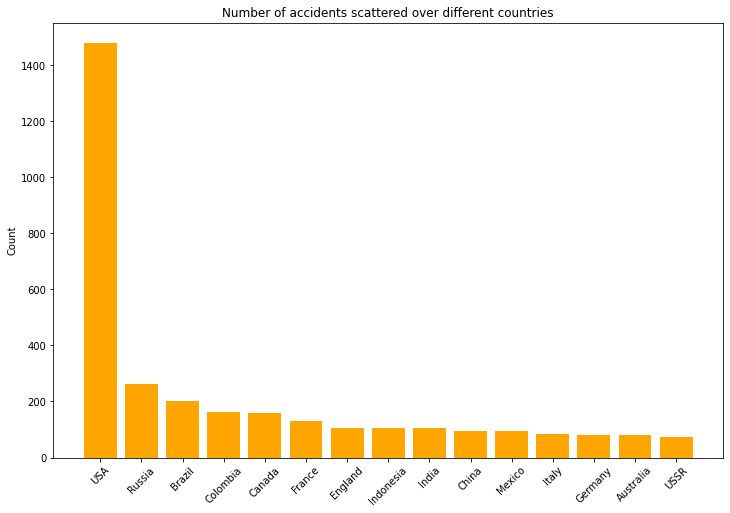

In [77]:
plt.figure(figsize=(12,8))
plt.bar(height = loc_count.values, x = loc_count.index, color = "orange")
plt.xticks(rotation=45)
plt.title("Number of accidents scattered over different countries")
plt.ylabel("Count")
plt.show()

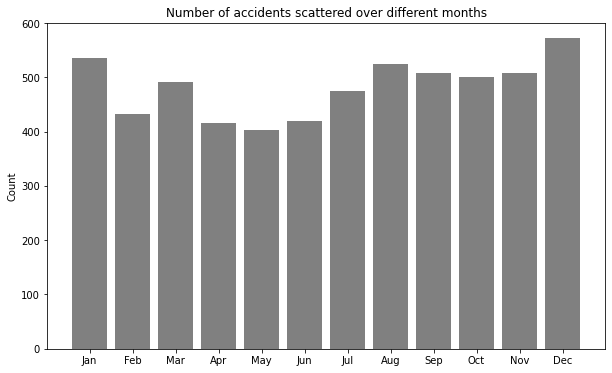

In [78]:
df["year"] = df.date.dt.year
df["month"] = df.date.dt.month

mm = df.month.value_counts().sort_index()
plt.figure(figsize=(10,6))
plt.bar(height = mm.values, x = look_up.keys(), color = "grey")
plt.title("Number of accidents scattered over different months")
plt.ylabel("Count")
plt.show()

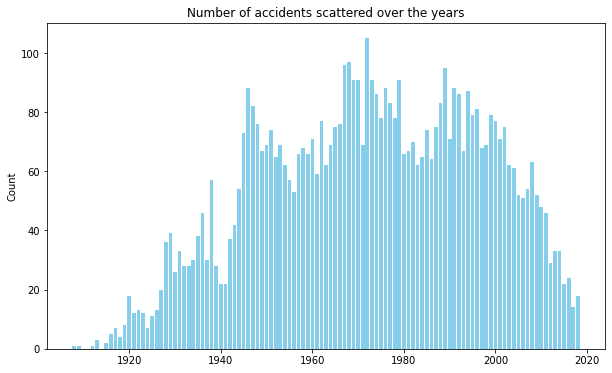

In [79]:
mm = df.year.value_counts().sort_index()
plt.figure(figsize=(10,6))
plt.bar(height = mm.values, x = mm.index, color = "skyblue")
plt.title("Number of accidents scattered over the years")
plt.ylabel("Count")
plt.show()

* __January, August and Decemeber__ are when most accidents happen
* The trend shows an increase in number of accidents but has been plumetting since the 1990s

# Next Steps

The cleaned data can be used for future analyses and consists of the following cleaned/derived columns

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5783 entries, 0 to 5782
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           5783 non-null   datetime64[ns]
 1   time           3656 non-null   datetime64[ns]
 2   location       5777 non-null   category      
 3   operator       5762 non-null   object        
 4   route          4289 non-null   object        
 5   ac_type        5759 non-null   object        
 6   ground         5731 non-null   float64       
 7   summary        5552 non-null   object        
 8   military_flag  5762 non-null   object        
 9   tot_aboard     5743 non-null   float64       
 10  tot_crew       5244 non-null   float64       
 11  tot_pass       5240 non-null   float64       
 12  tot_fatal      5772 non-null   float64       
 13  fatal_crew     5227 non-null   float64       
 14  fatal_pass     5225 non-null   float64       
 15  fatality_rate  5738 n